### News about PyPerf Jupyter Kernel (Performance Monitoring and Analysis in Jupyter)
- added metrics to display in Jupyter (mean/max/min, raw values) for: CPU,GPU,Mem
- use dropdown menus to select metrics (interactively)
- use in-memory serialization instead of disk-based for Score-P execution
- modular system for backbone serializer (dill/cloudpickle)

---

**Toy Example:** Estimating Pi by Throwing Darts

In [1]:
%env JUMPER_REPORT_FREQUENCY=2

env: JUMPER_REPORT_FREQUENCY=2


In [2]:
%env JUMPER_REPORTS_MIN=2

env: JUMPER_REPORTS_MIN=2


In [3]:
%env SCOREP_ENABLE_TRACING=1
%env SCOREP_ENABLE_PROFILING=0
%env SCOREP_TOTAL_MEMORY=3g

env: SCOREP_ENABLE_TRACING=1
env: SCOREP_ENABLE_PROFILING=0
env: SCOREP_TOTAL_MEMORY=3g


In [4]:
from random import random
import time
from multiprocessing import Pool
import sys

In [7]:
def throw_dart(iterations: int) -> int:
    hits = 0
    for i in range(iterations):
        x = random()
        y = random()
        if (x * x) + (y * y) <= 1:
            hits = hits + 1
    return hits


def compute_pi(iterations, process_count):
    pool = Pool(processes=process_count)
    trials_per_process = [int(iterations / process_count)] * process_count

    start = time.time()

    hits = pool.map(throw_dart, trials_per_process)
    pi = (sum(hits) * 4) / iterations

    end = time.time()

    print(pi)

In [8]:
# 10⁹ iterations on 2 CPUs
compute_pi(10**8, 2)

3.14178844

----Performance Data----
Duration: 15.69

CPU Util (Across CPUs)       	AVG: 53.33	 MIN: 0.50	 MAX: 100.00
Mem Util in GB (Across nodes)	AVG: 13.49	 MIN: 13.49	 MAX: 13.50
IO Ops (excl.) Read          	Total: 3784
               Write         	Total: 408
IO Bytes (excl.) Read        	Total: 0.19
                 Write       	Total: 0.29


In [9]:
# 10⁹ iterations on 8 CPUs
compute_pi(10**8, 8)

3.14178776

----Performance Data----
Duration: 7.59

CPU Util (Across CPUs)       	AVG: 99.55	 MIN: 85.70	 MAX: 100.00
Mem Util in GB (Across nodes)	AVG: 13.50	 MIN: 13.49	 MAX: 13.51
IO Ops (excl.) Read          	Total: 4123
               Write         	Total: 494
IO Bytes (excl.) Read        	Total: 0.19
                 Write       	Total: 0.32


Button(description='Add Display', style=ButtonStyle())

Output()

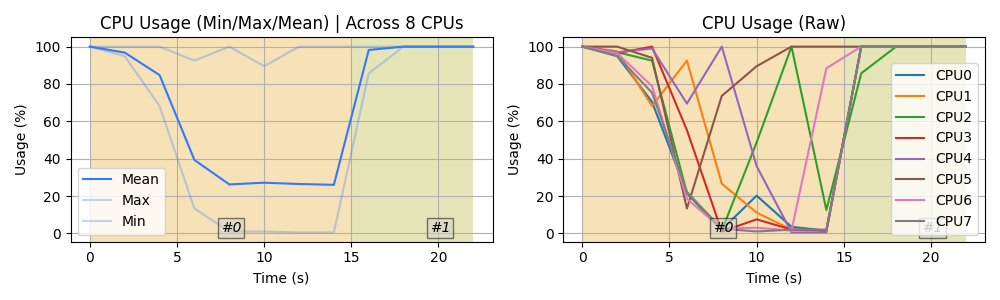

In [10]:
%%display_graph_for_all

In [ ]:
%%display_code_history

In [ ]:
%%display_code_for_index 0

In [ ]:
%%display_code_for_index 1

In [ ]:
%%display_graph_for_index 0

In [ ]:
%%display_graph_for_last

In [ ]:
%%perfdata_to_variable myvar

In [ ]:
myvar

In [ ]:
%%perfdata_to_json myfile

---
**Plans:**
- retrieve metrics on multiple nodes (add network, psutil delivers that)
- parallel serialization (for scorep)
- show index as thumbnail or so when hovering the graphs